In [68]:
import glob
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scienceplots


In [69]:
from jinja2 import Environment, ChoiceLoader, FileSystemLoader
from IPython.display import HTML
from pandas.io.formats.style import Styler

class TabularStyler(Styler):
    env = Environment(
        loader=ChoiceLoader([
            FileSystemLoader("templates"),  # contains ours
            Styler.loader,  # the default
        ]),
        trim_blocks=True,
    )
    template_latex = env.get_template("tabularx.tpl")

In [70]:
def parse_send(folder):
    result_files = glob.glob(os.path.join(folder,'send*.txt'))
    res = 0
    for f in result_files:
        with open(f, 'r') as file:
            lines = file.readlines()

    
        res += len(lines)

    return res

In [71]:
def parse_res(folder):
    result_files = glob.glob(os.path.join(folder,'results_delay*.txt'))
    res = []
    for f in result_files:
        with open(f, 'r') as file:
            lines = file.readlines()

    
        a = map(lambda x: x.split(' ')[-1].strip(), lines)
        #remove empty strings
        a = filter(lambda x: x != '', a)
        a = map(lambda x: float(x), a)
        res += list(a)

    return res

In [72]:
def parse_to_df_res(path):
    #get all the folders
    folders = glob.glob(os.path.join(path, '*'))

    dfs = []

    for folder in folders:
        #get the number of ues
        print(folder)
        match = re.search(r"sim(\d+)", folder)
        numUEs = int(match.group(1))

        res = parse_res(folder)

        dfs.append(pd.DataFrame({'delay': res, 'gnbs': numUEs}))



    df = pd.concat(dfs)
    df['scenario'] = path

    # dump the df to pickle
    df.to_pickle(f'df_{path}.pkl')

    return df


def parse_to_df_send(path):
    #get all the folders
    folders = glob.glob(os.path.join(path, '*'))

    d = {}

    for folder in folders:
        #get the number of ues
        print(folder)
        match = re.search(r"sim(\d+)", folder)
        numUEs = int(match.group(1))

        res = parse_send(folder)

        d[numUEs] = res



    df = pd.DataFrame({'packets': d})
    df['scenario'] = path

    return df




In [73]:
gnb_df = parse_to_df_res(path = 'gnb_multi')

gnb_multi/sim3_gnbs
gnb_multi/sim11_gnbs
gnb_multi/sim10_gnbs
gnb_multi/sim8_gnbs
gnb_multi/sim1_gnbs
gnb_multi/sim15_gnbs
gnb_multi/sim4_gnbs
gnb_multi/sim2_gnbs
gnb_multi/sim13_gnbs
gnb_multi/sim9_gnbs
gnb_multi/sim14_gnbs
gnb_multi/sim6_gnbs
gnb_multi/sim5_gnbs
gnb_multi/sim12_gnbs
gnb_multi/sim7_gnbs


In [74]:
sent_df = parse_to_df_send(path = 'gnb_multi')

#bit rate
sent_df['bitrate'] = sent_df['packets'] * 34 / (15 * 60)  #kbit/s
display(sent_df)

gnb_multi/sim3_gnbs
gnb_multi/sim11_gnbs
gnb_multi/sim10_gnbs
gnb_multi/sim8_gnbs
gnb_multi/sim1_gnbs
gnb_multi/sim15_gnbs
gnb_multi/sim4_gnbs
gnb_multi/sim2_gnbs
gnb_multi/sim13_gnbs
gnb_multi/sim9_gnbs
gnb_multi/sim14_gnbs
gnb_multi/sim6_gnbs
gnb_multi/sim5_gnbs
gnb_multi/sim12_gnbs
gnb_multi/sim7_gnbs


packets   scenario       bitrate
1    491726  gnb_multi  18576.315556
2    491224  gnb_multi  18557.351111
3    485752  gnb_multi  18350.631111
4    492009  gnb_multi  18587.006667
5    492075  gnb_multi  18589.500000
6    486071  gnb_multi  18362.682222
7    494429  gnb_multi  18678.428889
8    492770  gnb_multi  18615.755556
9    493277  gnb_multi  18634.908889
10   493394  gnb_multi  18639.328889
11   493084  gnb_multi  18627.617778
12   488654  gnb_multi  18460.262222
13   492365  gnb_multi  18600.455556
14   485928  gnb_multi  18357.280000
15   490460  gnb_multi  18528.488889

In [75]:
unfiltered_stats = gnb_df.groupby('gnbs')['delay'].describe()
display(unfiltered_stats)


count      mean       std       min       25%       50%       75%  \
gnbs                                                                         
1     402483.0  0.023258  0.029196  0.009374  0.014869  0.019709  0.021179   
2     406987.0  0.018189  0.009945  0.009000  0.013790  0.019283  0.020297   
3     456303.0  0.017102  0.003327  0.010030  0.013705  0.019033  0.019729   
4     461850.0  0.016301  0.003266  0.013000  0.013546  0.014409  0.019476   
5     462049.0  0.015465  0.002854  0.013000  0.013458  0.013901  0.019025   
6     455894.0  0.016398  0.014860  0.011270  0.013445  0.013868  0.015793   
7     465364.0  0.014474  0.002237  0.009572  0.013365  0.013743  0.014439   
8     463852.0  0.015024  0.002712  0.011602  0.013414  0.013805  0.014978   
9     464595.0  0.014807  0.002450  0.013000  0.013399  0.013784  0.014763   
10    463553.0  0.014021  0.001223  0.013000  0.013343  0.013703  0.014138   
11    464533.0  0.013970  0.001134  0.010283  0.013335  0.013662  0.014080   
12    459267.0  0.013978  0.001175  0.009960  0.013324  0.013680  0.014091   
13    463208.0  0.014144  0.001553  0.011560  0.013356  0.013695  0.014198   
14    458022.0  0.014385  0.001946  0.010695  0.013367  0.013727  0.014440   
15    462715.0  0.013947  0.000991  0.013000  0.013320  0.013677  0.014163   

           max  
gnbs            
1     3.169393  
2     1.976161  
3     0.041155  
4     0.037749  
5     0.050335  
6     2.000719  
7     0.039060  
8     0.050205  
9     0.033472  
10    0.028385  
11    0.031031  
12    0.031402  
13    0.032402  
14    0.037950  
15    0.028000

In [76]:
pkt_loss = unfiltered_stats['count'] / sent_df['packets']
print(pkt_loss) 

gnbs
1     0.818511
2     0.828516
3     0.939374
4     0.938702
5     0.938981
6     0.937916
7     0.941215
8     0.941315
9     0.941854
10    0.939519
11    0.942097
12    0.939861
13    0.940782
14    0.942572
15    0.943431
dtype: float64


In [77]:
def filter_outliers(df, quantile=0.99):
    return df[df["delay"] <= df.groupby("gnbs")["delay"].transform(lambda x: x.quantile(quantile))]


In [78]:
# filter out the outliers 99th percentile
gnb_df_filtered = filter_outliers(gnb_df)

gnb_df_filtered['delay'] = gnb_df_filtered['delay'] * 1000 # convert to ms

# convert gnbs to categorical
gnb_df_filtered['gnbs'] = gnb_df_filtered['gnbs'].astype('category')

/tmp/ipykernel_3167/1289439653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gnb_df_filtered['delay'] = gnb_df_filtered['delay'] * 1000 # convert to ms
/tmp/ipykernel_3167/1289439653.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gnb_df_filtered['gnbs'] = gnb_df_filtered['gnbs'].astype('category')


In [79]:
stat = gnb_df_filtered.groupby('gnbs')['delay'].describe()
display(stat)

count       mean       std        min        25%        50%  \
gnbs                                                                   
1     398458.0  21.839552  9.925991   9.373758  14.802531  19.696177   
2     402918.0  17.907384  3.855104   9.000000  13.787653  19.268773   
3     451750.0  16.999585  3.175235  10.030416  13.698208  19.018808   
4     457301.0  16.199337  3.113699  13.000000  13.537459  14.368262   
5     457428.0  15.366048  2.683421  13.000000  13.454968  13.890272   
6     451339.0  15.683982  4.157248  11.270346  13.441203  13.862015   
7     460788.0  14.350377  1.858105   9.571500  13.361785  13.733997   
8     459219.0  14.903104  2.423825  11.601880  13.411301  13.800464   
9     459952.0  14.697078  2.197678  13.000000  13.394382  13.774291   
10    458929.0  13.953208  1.010953  13.000000  13.339825  13.694407   
11    459905.0  13.904633  0.927935  10.282765  13.331679  13.655945   
12    454687.0  13.910516  0.953770   9.959620  13.321463  13.668631   
13    458581.0  14.058356  1.285542  11.559728  13.350727  13.687233   
14    453445.0  14.286514  1.677538  10.695453  13.362540  13.716413   
15    458088.0  13.892922  0.823568  13.000000  13.317521  13.670023   

            75%        max  
gnbs                        
1     21.026549  69.001118  
2     20.236019  32.001397  
3     19.712518  25.494281  
4     19.443086  25.609775  
5     18.347968  22.705945  
6     15.626804  38.158835  
7     14.394372  25.330181  
8     14.904578  25.103310  
9     14.708442  22.817116  
10    14.085789  19.721719  
11    14.025594  19.524557  
12    14.047327  19.543718  
13    14.150122  20.446962  
14    14.394260  21.252840  
15    14.123429  17.813798

In [96]:
tab_path = '/home/alberto/Jobs/Papers/work_in_progress/IEC61850_AMPS_2023/tables'

final_stats = pd.concat([stat, pkt_loss], axis=1)

final_stats[0] = final_stats[0] * 100

p = final_stats.drop(columns=['count', '25%', '50%', '75%'])
p.index.names = ['GNBs']
p.rename(columns={'mean': 'Mean ($ms$)', 'std': 'Std ($ms$)', 'min': 'Min ($ms$)', 'max': 'Max ($ms$)', 0: 'PDR (\%)'}, inplace=True)

display(p)

s = TabularStyler(p)
s.format('{:.2f}')
s.to_latex(os.path.join(tab_path, 'table_multi_gnb.tex'), hrules=True, clines="all;data", column_format='lrrrrr', multicol_align='|c|')

Mean ($ms$)  Std ($ms$)  Min ($ms$)  Max ($ms$)   PDR (\%)
GNBs                                                            
1       21.839552    9.925991    9.373758   69.001118  81.851072
2       17.907384    3.855104    9.000000   32.001397  82.851611
3       16.999585    3.175235   10.030416   25.494281  93.937441
4       16.199337    3.113699   13.000000   25.609775  93.870234
5       15.366048    2.683421   13.000000   22.705945  93.898085
6       15.683982    4.157248   11.270346   38.158835  93.791648
7       14.350377    1.858105    9.571500   25.330181  94.121502
8       14.903104    2.423825   11.601880   25.103310  94.131542
9       14.697078    2.197678   13.000000   22.817116  94.185417
10      13.953208    1.010953   13.000000   19.721719  93.951892
11      13.904633    0.927935   10.282765   19.524557  94.209709
12      13.910516    0.953770    9.959620   19.543718  93.986133
13      14.058356    1.285542   11.559728   20.446962  94.078174
14      14.286514    1.677538   10.695453   21.252840  94.257174
15      13.892922    0.823568   13.000000   17.813798  94.343066

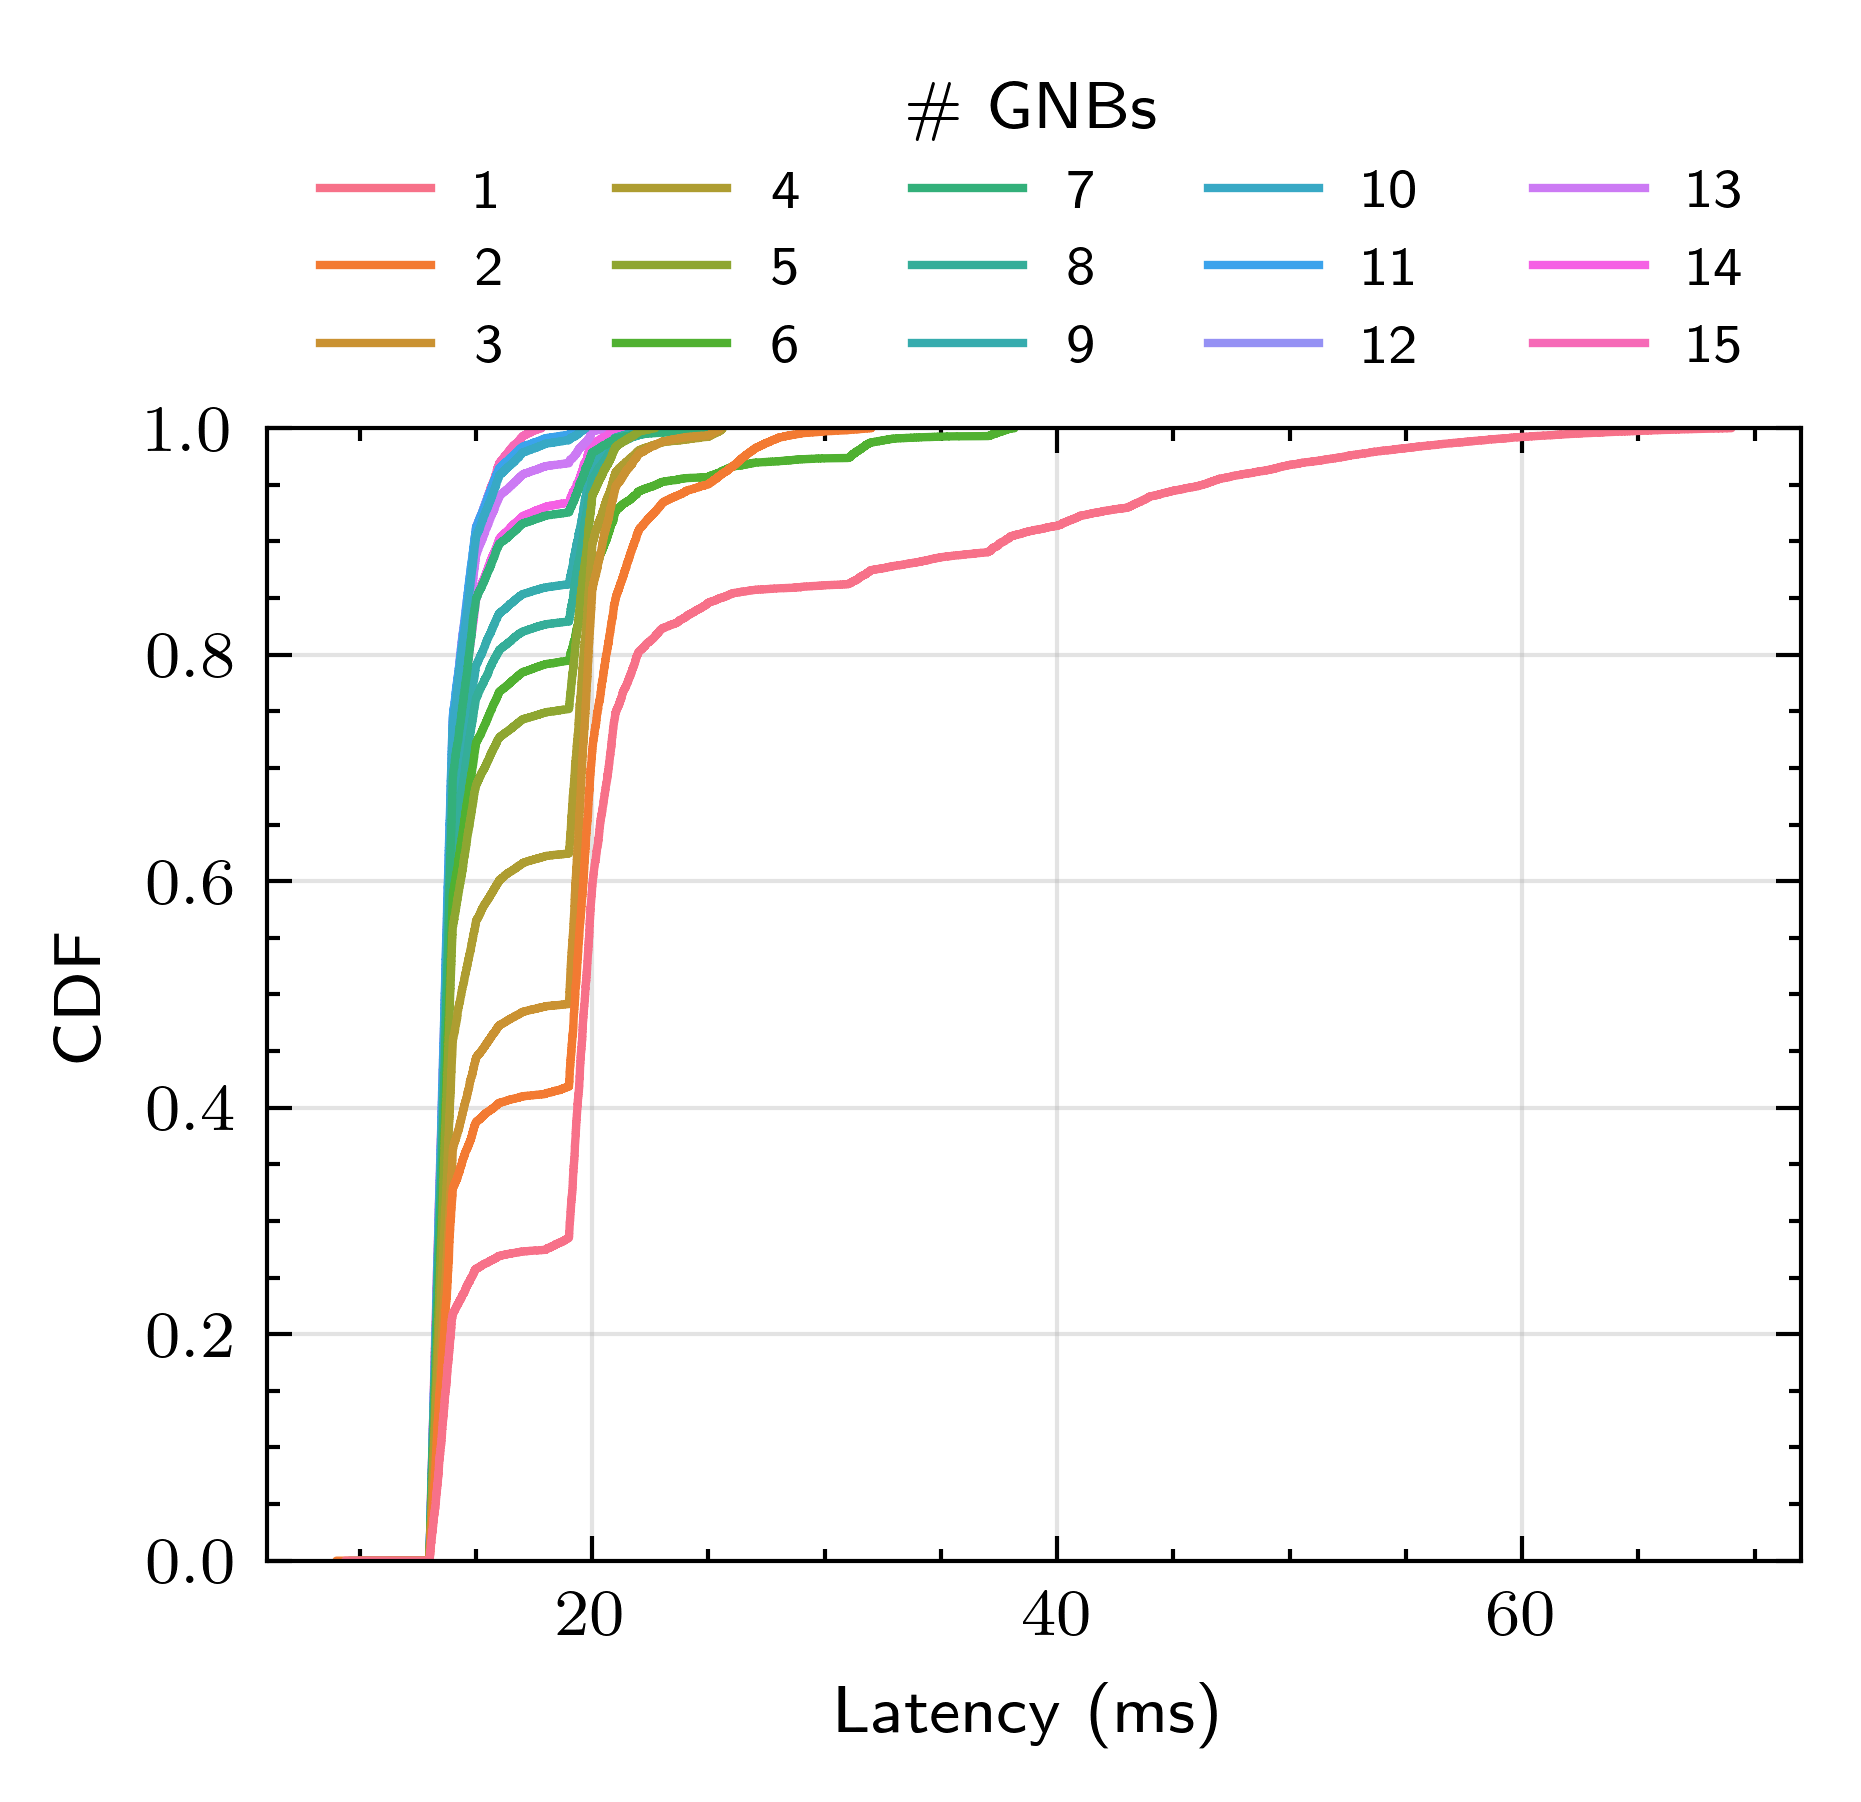

In [87]:
# plot cdf
fig_path = '/home/alberto/Jobs/Papers/work_in_progress/IEC61850_AMPS_2023/Images'
plot_style = ['./science_frame_on_small_legend.mplstyle', './ieee.mplstyle']
with plt.style.context(plot_style):
    g = sns.ecdfplot(data=gnb_df_filtered, x="delay", hue="gnbs")
    g.set(xlabel='Latency (ms)', ylabel='CDF')
    plt.grid(True)
    sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 1.35), ncol=5, fancybox=True, shadow=True, title='\# GNBs')
    #plt.legend(title='GNBs', loc='upper center', bbox_to_anchor=(0.5, 1.3))
    #g.legend(title='GNBs', loc='upper center', bbox_to_anchor=(0.5, 1.3),  ncol=3, fancybox=True, shadow=True)
    plt.savefig(os.path.join(fig_path, 'gnb_multi_cdf.pdf'), bbox_inches='tight')



1 clusters for 1 clusters
2 clusters for 2 clusters
3 clusters for 3 clusters
4 clusters for 4 clusters


5 clusters for 5 clusters
6 clusters for 6 clusters
7 clusters for 7 clusters
8 clusters for 8 clusters
9 clusters for 9 clusters
10 clusters for 10 clusters
11 clusters for 11 clusters
12 clusters for 12 clusters
13 clusters for 13 clusters
14 clusters for 14 clusters
15 clusters for 15 clusters


label            x            y
0        1  2832.916667  1995.555556
1        2  3536.785714  1913.214286
2        2   369.375000  2283.750000
3        3  3347.500000  2358.750000
4        3   369.375000  2283.750000
..     ...          ...          ...
115     15  4010.000000  1002.500000
116     15  4010.000000    65.000000
117     15  3260.000000  2940.000000
118     15  2822.500000  2440.000000
119     15  3260.000000  2065.000000

[120 rows x 3 columns]

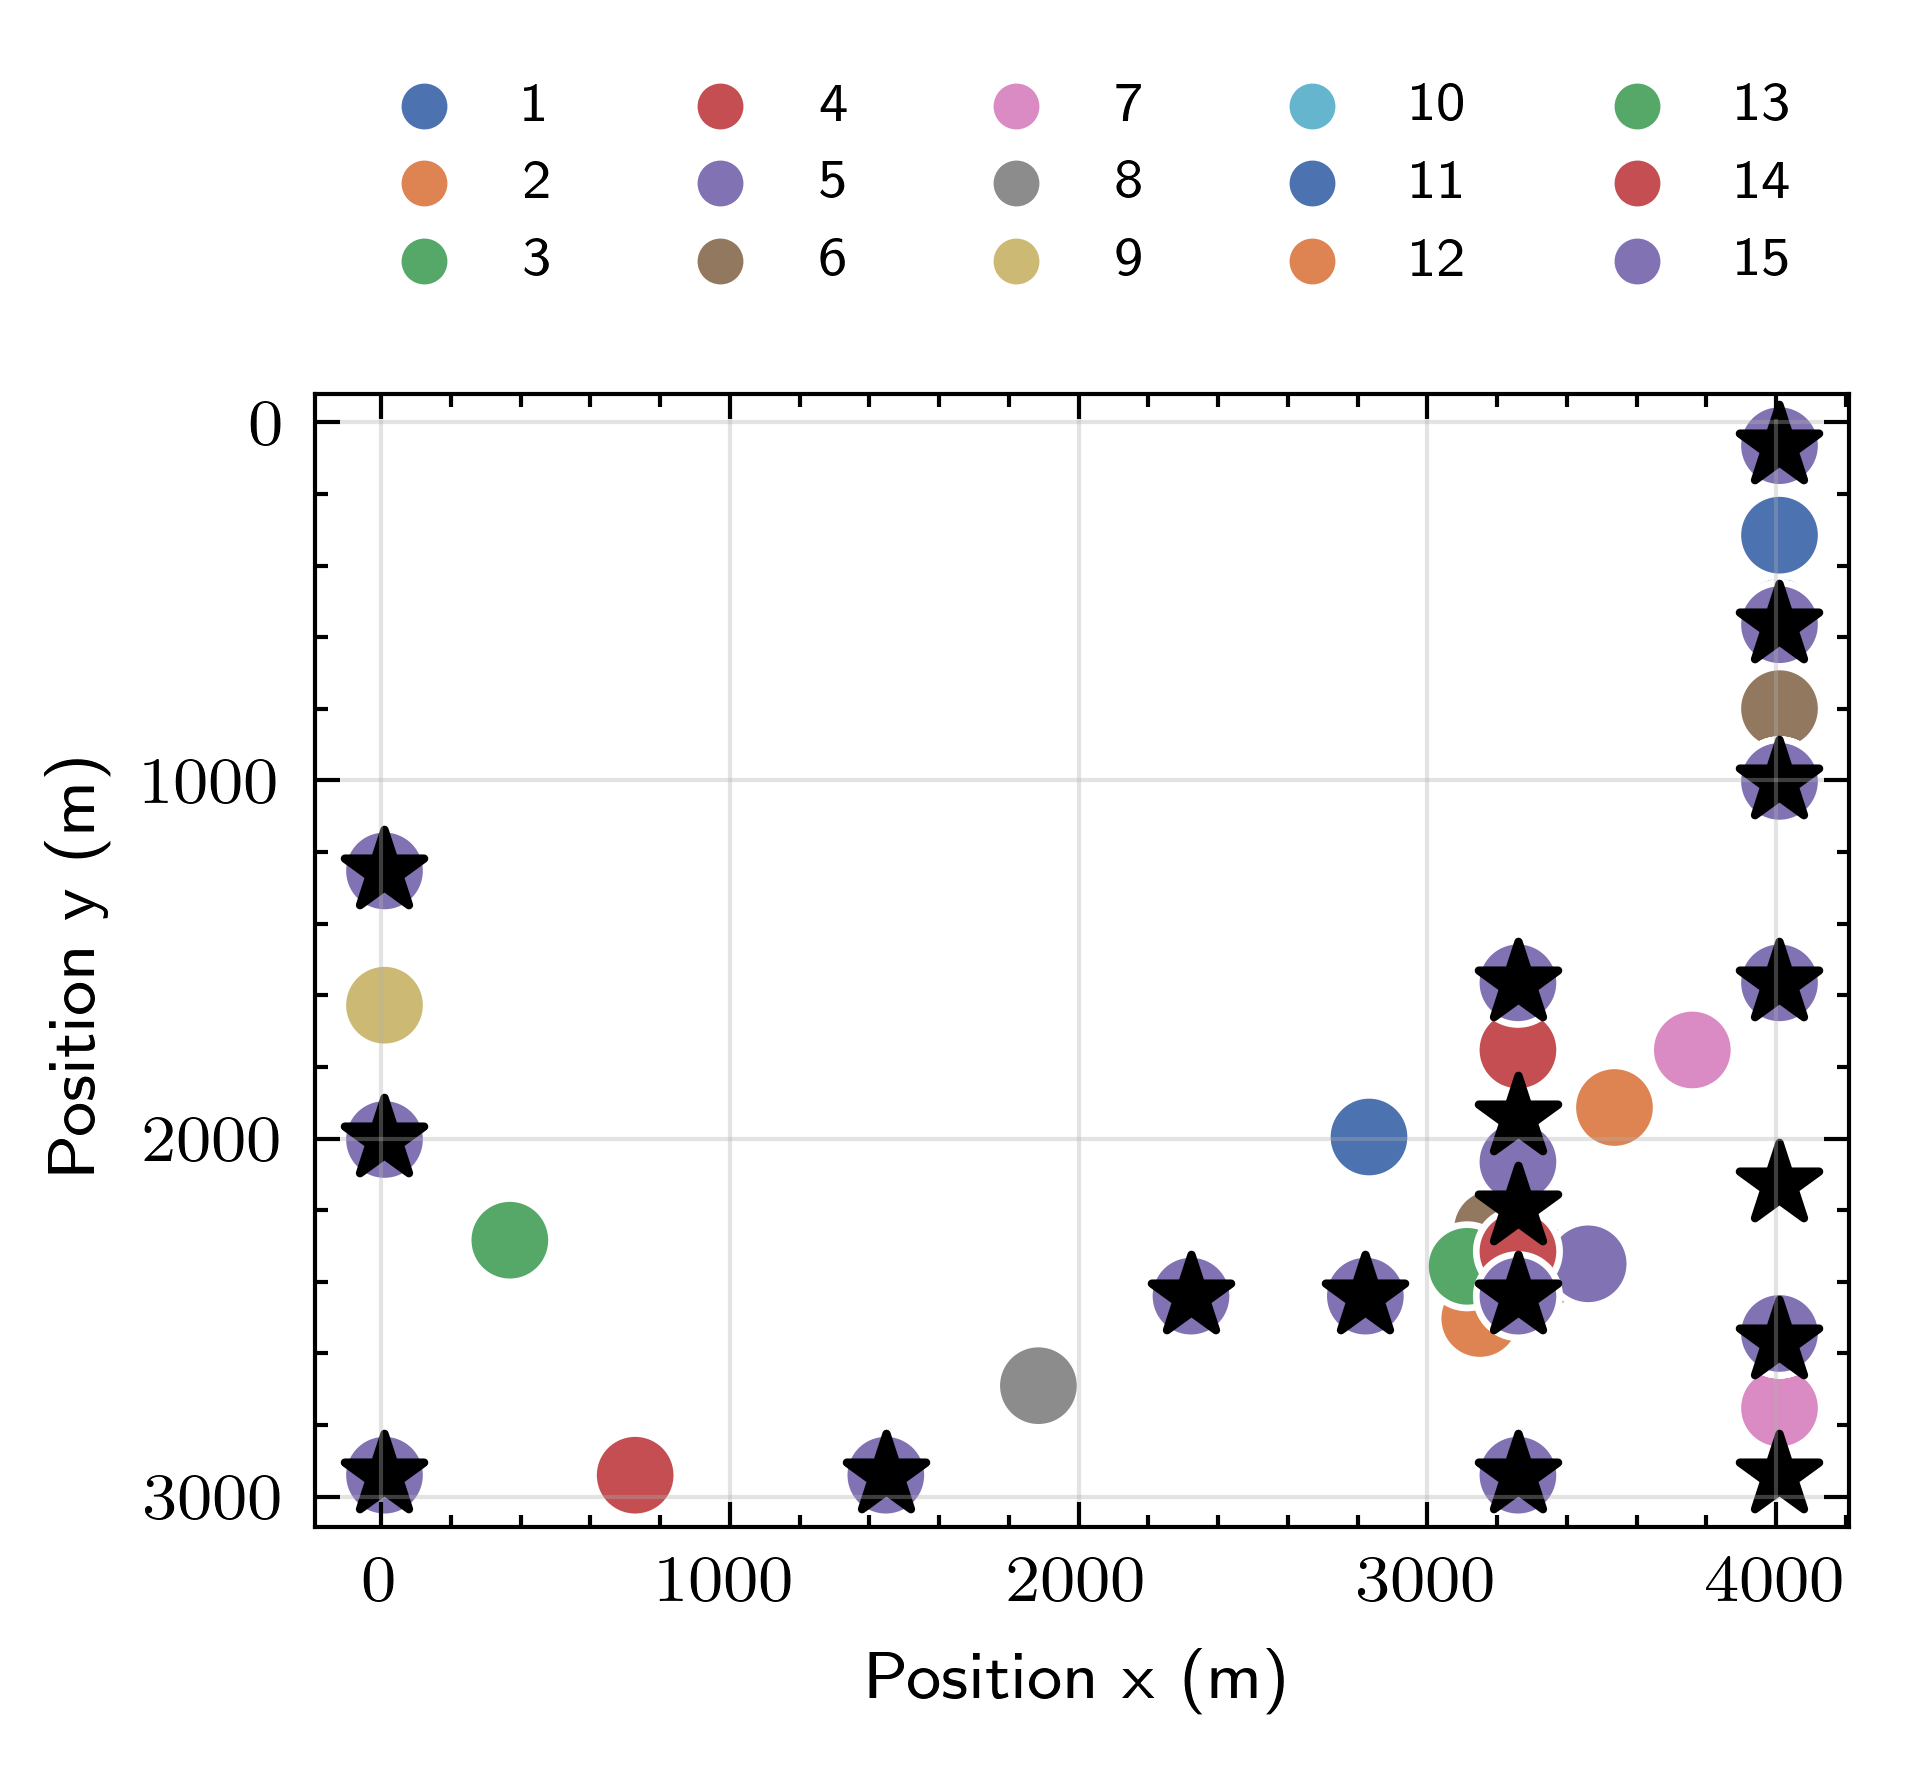

In [95]:
points = np.array([[10, 2950 - 1697.5],
          [10, 2950 - 947.5],
          [10, 2950 - 10],
          [1447.5, 2950 - 10],
          [3260, 2950 - 10],
          [4010, 2950 - 10],
          [4010, 2950 - 385],
          [4010, 2950 - 822.5],
          [4010, 2950 - 1385],
          [4010, 2950 - 1947.5],
          [4010, 2950 - 2385],
          [4010, 2950 - 2885],
          [3260, 2950 - 510],
          [2822.5, 2950 - 510],
          [2322.5, 2950 - 510],
          [3260, 2950 - 760],
          [3260, 2950 - 1010],
          [3260, 2950 - 1385]])


from sklearn.cluster import KMeans

data = []
for i in range(1, 16):
    ckeck = {}
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(points)

    ccs = kmeans.cluster_centers_
    for c in ccs:
        data.append([i, c[0], c[1]])
        ckeck[(c[0], c[1])] = i

    print(f"{len(ckeck)} clusters for {i} clusters")



# Create DataFrame
df = pd.DataFrame(data, columns=["label", "x", "y"])

# Print the resulting DataFrame
display(df)

with plt.style.context(plot_style):
    g = sns.scatterplot(data=df, x="x", y="y", hue="label", palette="deep", s=100)
    #plot the points with a star
    plt.scatter(points[:,0], points[:,1], marker='*', s=100, c='black')

    #invert axis
    plt.gca().invert_yaxis()
    #plt.gca().invert_xaxis()

    g.set(xlabel='Position x (m)', ylabel='Position y (m)')
    plt.grid(True)
    sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 1.32), ncol=5, fancybox=True, shadow=True, title='')
    #plt.legend(title='GNBs', loc='upper center', bbox_to_anchor=(0.5, 1.3))
    #g.legend(title='GNBs', loc='upper center', bbox_to_anchor=(0.5, 1.3),  ncol=3, fancybox=True, shadow=True)
    plt.savefig(os.path.join(fig_path, 'gnb_multi_positioning.pdf'), bbox_inches='tight')

